# Integrated Project - 1 - Game success prediction

In this project I will be analyzing data regarding video games for the online store Ice. For each game, the data includes its general details, sales information and rates given by critics and users. My goal is to identify patters that determine whether a game succeeds or not, in order to plan advertising campaigns for the next year. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
from scipy import stats as st

# Load the dataset and print an overview

try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

df.info()
df.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9347,Vampire Moon: The Mystery of the Hidden Sun,DS,2010.0,Adventure,0.12,0.01,0.00,0.01,50.0,tbd,E
695,LEGO Star Wars: The Complete Saga,PS3,2007.0,Action,1.02,0.90,0.00,0.36,80.0,6.7,E10+
2300,Destruction Derby,PS,1995.0,Racing,0.50,0.34,0.00,0.06,NaN,NaN,NaN
13632,Saint Seiya: The Hades,PS2,2006.0,Fighting,0.00,0.00,0.04,0.00,NaN,NaN,NaN
16306,Tomoyo After: It's a Wonderful Life CS Edition,PS2,2007.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2188,Star Fox 64 3D,3DS,2011.0,Shooter,0.48,0.27,0.13,0.06,81.0,8.2,E10+
7787,Trivial Pursuit unhinged,PS2,2004.0,Misc,0.09,0.07,0.00,0.02,51.0,tbd,T
11709,Monkey Hero,PS,1998.0,Action,0.04,0.03,0.00,0.00,NaN,NaN,NaN
6538,J-League Pro Soccer Club wo Tsukurou!,SAT,1996.0,Sports,0.00,0.00,0.26,0.00,NaN,NaN,NaN
4533,Petz: Horsez 2,DS,2007.0,Simulation,0.39,0.00,0.00,0.03,NaN,tbd,E


In [2]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Preparing the Data

### Replace column name
I will change the column names to lower case so it will be easier to handle.

In [3]:
# Change columns to lower case using str.lower()

df.columns = df.columns.str.lower()

# Check that it worked...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Missing Values
There are several columns with missing values that I need to take care of.
First, there are 2 missing values in the 'name' and 'genre' columns. As can be seen below, these are the same rows - the same two games are missing values for 'name' and 'genre'. They also have missing values in critic_score, user_score and rating. It will not be possible to fill these values in any logical way, other than filling it with 'Unknown' value. However, to keep my analysis cleaner, I decided to remove these two rows.

In [4]:
# Print rows with missing value for 'name' 

df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
# Dropping the missing values in 'name' and 'genre'

df.dropna(subset=['name'], inplace=True)

# Check that it worked

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Next, I will address the missing values in the following columns: 'year_of_release', 'critic_score', 'user_score' and 'rating'.

There are around 300 missing values in 'year_of_release'. As can be seen below, each platform generally had different year of activity and the mean release year for each platform varies. Therefore, I can fill the missing values using the mean value of each platform and get a relatively accurate result.

In [6]:
# Average year of release by platform

df.groupby('platform')['year_of_release'].mean().head()

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.126953
DC      1999.942308
DS      2008.185290
Name: year_of_release, dtype: float64

In [7]:
# Filling missing values in 'years_of_release' by the mean year of each platform

df['year_of_release'] = df['year_of_release'].fillna(df.groupby(['platform'])['year_of_release'].transform('mean')).round()

# Check that it worked 

if (df['year_of_release'].isnull().sum()):
    print("There are still missing values!")
else:
    print("All missing values are gone.")

All missing values are gone.


I'm left with the missing values in 'critic_score', 'user_score' and 'rating'. There could be a number of reasons that these values are missing: An error when retrieving the data/saving it in the dataset, or some of the games did not appear in the source of this data at the time it was retrieved.

There are a few thousand missing values in each of these columns. One option to fill the 'rating' missing values is to use the most common value for their genre. The logic is that puzzle games will rarely be adult only. However, as can be seen in the graphs below, it is not always so conclusive, and since there are so many missing values, this could distort the data.

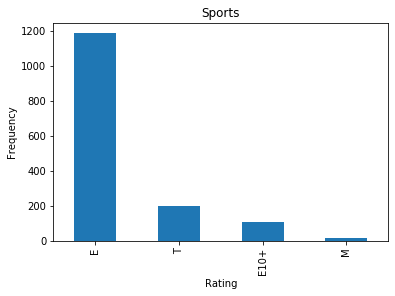

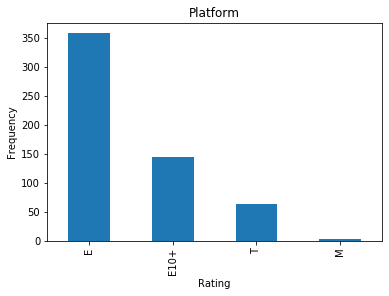

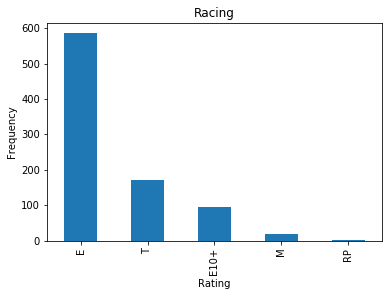

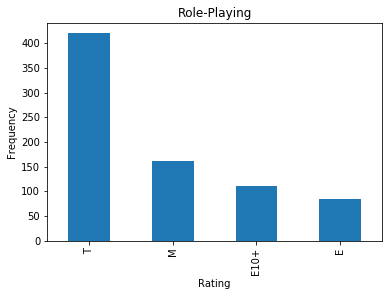

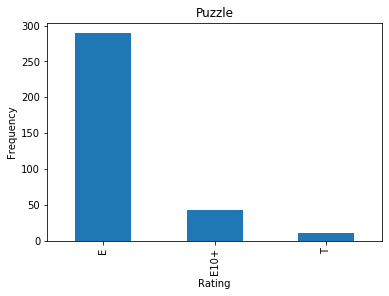

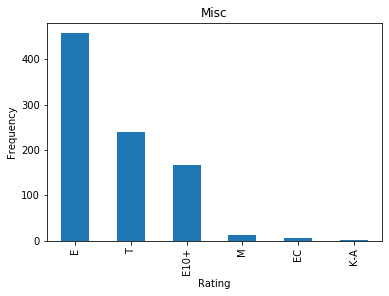

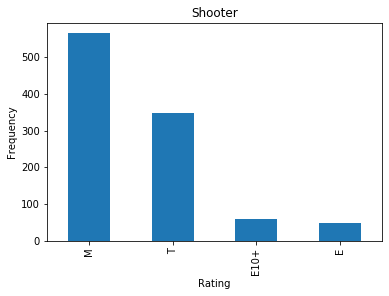

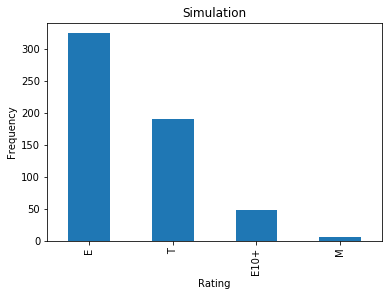

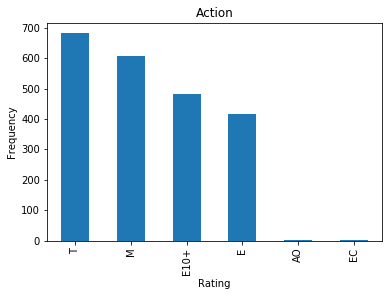

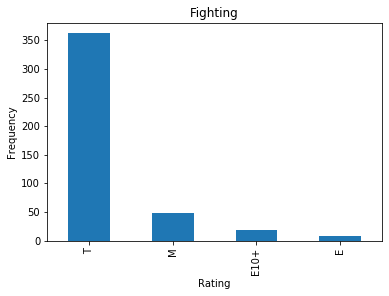

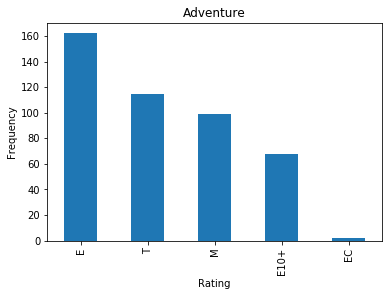

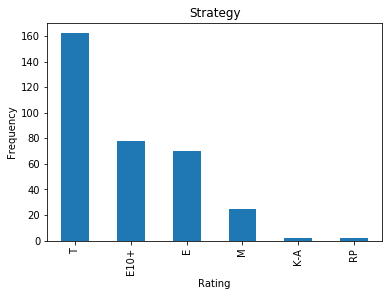

In [8]:
# Save genres in a list

genre_list = df['genre'].unique().tolist()

# Print a bar plot of the most common rating for each genre

for genre in genre_list:
    rating_barplot = df.query('genre == @genre')['rating'].value_counts().plot(kind='bar', title=genre)
    rating_barplot.set_xlabel("Rating")
    rating_barplot.set_ylabel("Frequency")
    plt.show()

Therefore, I decided to fill the missing values as follows: for the 'rating' column, I will fill the missing values with 'Unknown' value. For 'critic_score' and 'user_score' I will not fill the missing values, and simply keep them as they are. Thus, I will be able to filter out those who do not have missing values. 

In [9]:
# Fill missing values

df['rating'] = df['rating'].fillna('Unknown')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Lastly, in the 'user_score' column there are values defined as 'tbd' (To be determined). Let's have a look at them.

In [10]:
# 'tbd' values in 'user_score'

df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


There are 2,424 rows with 'tbd' value. As can be seen, some of them are not new games. It is possible that this dataset is not updated and the scores could be retrieved if I contact the source of the data. However, using the information I currently have, I can not retrieve this data. I will have to handle it the same way I handled the missing values - I will replace them to NaN.

In [11]:
# Replace 'tbd' with 0
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

# Check if there are any 'tbd' values left

if df.loc[df['user_score'] == 'tbd', 'user_score'].sum():
    print("There are still 'tbd' values")
else:
    print("All 'tbd' values were replaced!")

All 'tbd' values were replaced!


In [12]:
# Print dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Conclusions

In this section, I dealt with missing values. I had to remove two games that were missing information of their name and genre. Without this data, they could not contribute to my analysis. Next, I filled ~300 missing values in 'year_of_release' column, using the average year_of_release of other games in the same platform. Platforms are generally popular and active in different time periods, so the filled values should be pretty accurate. Then, I filled missing values in 'rating' column. Since there were a few thousand missing values, I simply filled them with 'Unknown' value. Lastly, I filled the missing values of 'critic_score' and 'user_score'. Here as well, missing values were in thousands. Also, each game has its own score best on its own features, and it would not be reasonable to fill them using similar values. I decided to fill them with zero, so I could easily filter them if needed later.

### Convert the data to the required types
Some of the columns are not in the required type. Here are the columns that need to be changed:
- year_of_release  -> int - refers to the year the game was released on, which is a real number - should be an integer.
- user_score -> float - user score should be numeric after dealing with 'tbd' values.

There is no need to change any other column. Name, platform, genre and rating are objects, sales and scores are float.

In [13]:
# Convert 'year_of_release' to int

df['year_of_release'] = df['year_of_release'].astype('int')

# Convert 'user_score' to numeric (float)

try: 
    df['user_score'] = pd.to_numeric(df['user_score'])
except:
    print("Could not transform 'user_score' to numeric")
    
# Check that it worked 

df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Conclusions

In this section, I converted two columns to the correct value - 'years_of_release' to int, as it represent a year, and 'critic_score' to float, as it consists of numeric scores.

### Setting the data
In this section, I will create and modify some columns to make my analysis simpler in the next stages. First, I will calculate the total sales for all regoins for each game. Then, I will adjust the scores in 'critic_score' and 'user_score' so they will be on the same scale, from 1 to 10.

In [14]:
# Sum all sales columns to a new 'total_sales' column

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# check that it worked 

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [15]:
# Divide 'critic_score' by 10 to match to 'user_score' scale of 1 to 10

df['critic_score'] = df['critic_score'].apply(lambda x: x/10)

# check that it worked

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


#### Conclusions
In this section I created a new column, 'total_sales', that sums the total of sales from all regions. In addition, I modified the 'critic_score' so it will match the scale in 'user_score' (1 to 10).

## Analysis
In this section, I will be analyzing the data. I will examine several questions:
- Number of games released in different years.
- Sales variation in different platforms.
- What time period is relevant for the analysis?
- What are the top platforms?
- Sales across platforms
- User/critics scores and sales.
- Game profits by genre

### Games Across Different Years

In this part I will examine how many games were released across different years.

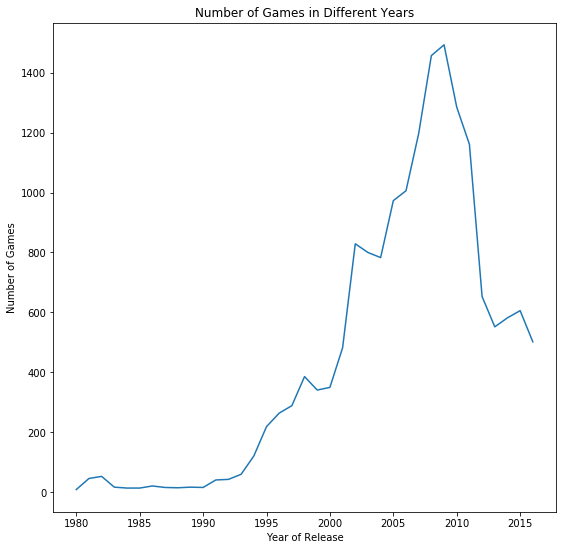

In [16]:
# Line plot of number of games per year_of_release

games_by_year = df.groupby('year_of_release')['name'].count()
games_by_year_plot = games_by_year.plot(kind='line', figsize=(9,9), title='Number of Games in Different Years');
games_by_year_plot.set_xlabel("Year of Release");
games_by_year_plot.set_ylabel("Number of Games");


As can be seen in the chart, number of game released each year varied sagnificatnly. Until the mid-90's, only a few games were released each year. The number grew significantly over the years, with 3 big leaps around 1995, 2000-2001 and 2005. The largest number of games were released between 2005 to 2010, expecially towards the latter. However, after this point the number dropped to less than a half in 2-3 years and remained at this level until 2016. 

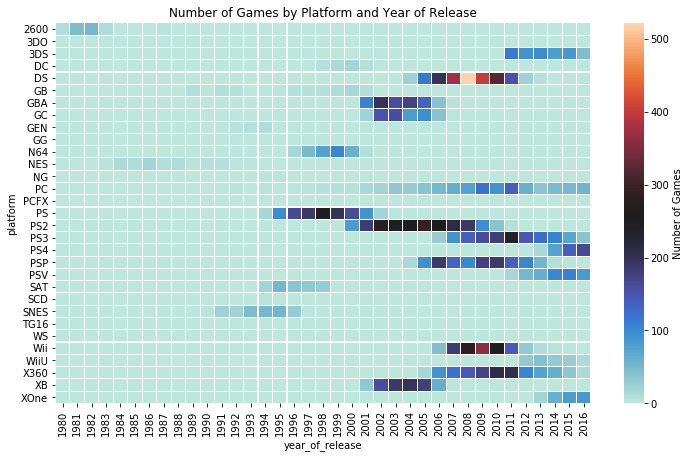

In [17]:
# Heatmap of number of games by platform and year_of_release

years_platform = df.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value=0)
plt.figure(figsize=(12,7))
plt.title('Number of Games by Platform and Year of Release')
sns.heatmap(years_platform, cmap="icefire", linewidths=0.1, cbar_kws={'label': 'Number of Games'});

This heatmap is an important addition to the line plot above, as it takes into consideration the different platforms as well. It shows that the number of games varied in the platform level, and can explain in part the drop in number of games after 2010. It is clear to see that platforms such as Wii and DS almost completely disappeared in 2011 and later.

#### Conclusion
The number of games varied significantly throught the years, also on the platform level. A few main time periods can be identified:
- 1980 to 1995, where only a few platforms existed and number of games each year was very slow.
- Mid-90s to 2005, where there has been a sharp increase in the number of games per year, alongside new platforms that were introduced, such as PS, PS2, XB and others.
- 2005 to 2010 are the top years in terms of games released, and also many new platforms entered the scene: DS, PSP, Wii, X360. 
- 2010-2016 - Where platforms such as Wii, PSP and DS almost completely disappeared, and the number of games dropped. 

### Sales variation in different platforms
In this section I will concentrate on sales variation across the different platforms. In my analysis I will relate to the sales distribution over the years for the top selling platforms, popular platforms that lost their audience and the cycle a platform goes from emergence, to popularity and disappearing.

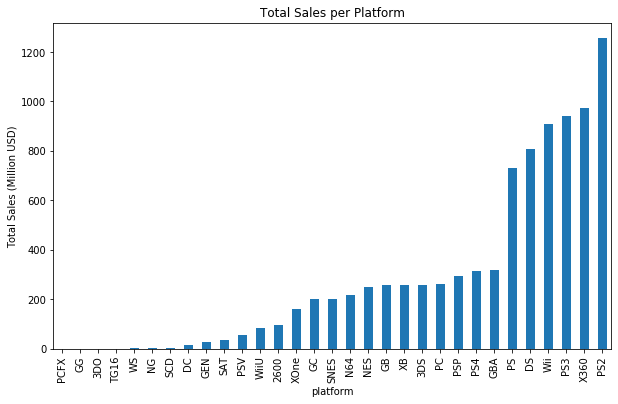

In [18]:
# Bar plot of total sales per different platform

sales_platform = df.groupby('platform')['total_sales'].sum().sort_values()

sales_platform.plot(kind='bar', figsize=(10,6),
                   title='Total Sales per Platform').set_ylabel("Total Sales (Million USD)");

As can be seen, some platforms are much more profitable than the others. PS2 is the most profitable platform, then in some distance come X360, PS3, Wii, DS and PS. I will take these 6 platforms and investigate their sales distribution over the years.

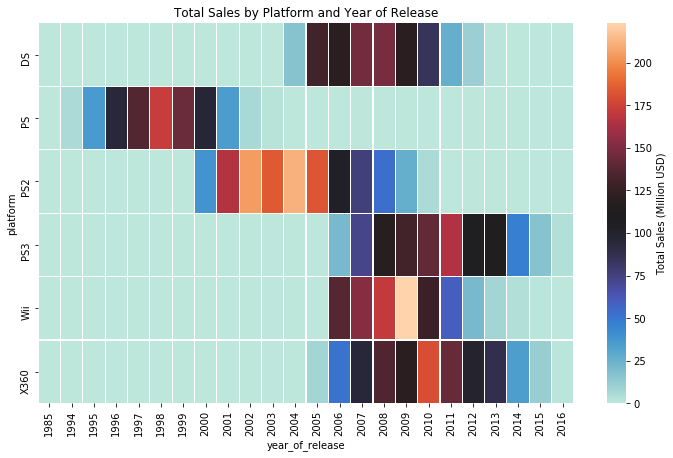

In [19]:
# Heatmap of sales for profitable platforms per year

profitable_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
sales_platform = df.query('platform in @profitable_platforms').pivot_table(index='platform', columns='year_of_release',
                                               values='total_sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,7))
plt.title('Total Sales by Platform and Year of Release')
sns.heatmap(sales_platform, cmap="icefire", linewidths=0.1, cbar_kws={'label': 'Total Sales (Million USD)'});

The heatmap shows that the top selling platforms varied quite a lot in the years they were active. In fact, all of the top selling platforms already faded away or about to fade away. DS, PS, PS2 and Wii had zero sales for the past few years, after they have been very popular. It can also be seen that it takes 7 to 10 years for a platform to emerge and completely fade away.

#### Conclusions

The most profitable platforms are PS2 (at the top), X360, PS3, Wii, DS, PS. Interestingly, most of them faded away completely, or in the late stages of fading away. Each of them had 7 to 10 years of higher profits until they were gone. 

### What time period is relevant for the analysis?

Concluding the results from the previous section, the right time period to use for my analysis should be up to 7 years. Since 7-10 years is the time it takes to a platform to emerge and disappear, choosing more than 7 years might pose the risk that in the next year, the current leading platforms would fade away and disappear. 

In addition, many changes occured after 2010, where platforms began fading away and the number of games dropped. In 2012 two very popular platforms disappeared, and the sharp drop in the number of games stopped. That's why I will focus my analysis in the years 2012 to 2016. 

In [20]:
# Filtering the data to the relevant years

df_filtered = df.query('year_of_release >= 2012')

print("Number of rows in the filtered dataset:", len(df_filtered))

Number of rows in the filtered dataset: 2895


#### Conclusion

We are left with 2895 games that were released since 2012. This will assure that our analysis contains only relevant data. 

### Top Platforms 2012-2016

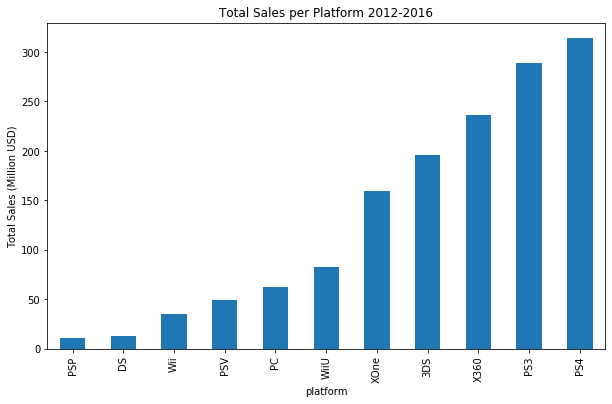

In [21]:
# Bar plot of total sales per platform in the filtered data

sales_platform_2012 = df_filtered.groupby('platform')['total_sales'].sum().sort_values()

sales_platform_2012.plot(kind='bar', figsize=(10,6),
                   title='Total Sales per Platform 2012-2016').set_ylabel('Total Sales (Million USD)');

The following chart shows that the leading platforms are PS4, PS3, X360, 3DS and XOne between 2012-2016. However, we better see which ones are growing and which ones are shrinking. First, let's create a simple heatmap that will show the total sales over the years.

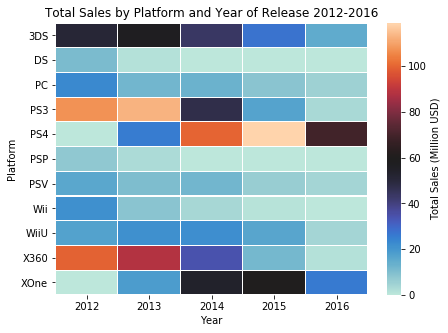

In [22]:
# Heatmap of the total sales by platform per year on filtered data
sales_platform_2012 = df_filtered.pivot_table(index='platform', columns='year_of_release',
                                               values='total_sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(7,5))
sns.heatmap(sales_platform_2012, cmap="icefire", linewidths=0.1, cbar_kws={'label': 'Total Sales (Million USD)'});
plt.title('Total Sales by Platform and Year of Release 2012-2016');
plt.ylabel("Platform");
plt.xlabel("Year");

The heatmap shows that PS3 and X360 are already fading away. 3DS is past its best years, but still relatively high in sales.  PS4 and XOne did better in the past few years. They both decreased in 2016, but it is worth mentioning that the data for 2016 is incomplete, and this might be a reason.

To better understand where each platform was going in the past few years, I will put into a similar heatmap the difference in total sales for each year.

In [23]:
# Create a table that will show the change in sales for each platform and year

sales_platform_shift = sales_platform_2012.T.shift(+1)
sales_platform_diff = sales_platform_2012.T - sales_platform_shift
sales_platform_diff = sales_platform_diff.query('year_of_release > 2012')

sales_platform_diff.T

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,6.40,-14.00,-15.98,-12.64
DS,-9.47,-1.54,0.00,0.00
PC,-10.84,0.90,-4.76,-3.27
PS3,5.89,-65.49,-30.94,-13.22
PS4,25.99,74.01,18.90,-49.65
PSP,-4.55,-2.90,-0.12,-0.12
PSV,-5.60,1.57,-5.91,-2.00
Wii,-13.12,-4.84,-2.61,-0.96
WiiU,4.09,0.38,-5.68,-11.75


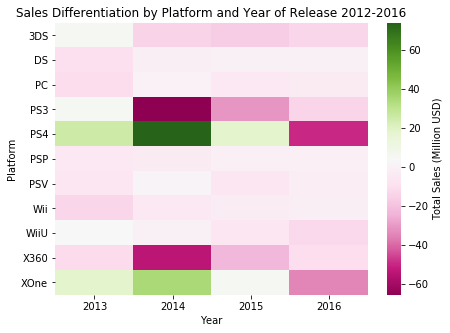

In [24]:
# Create a heatmap for the change in sales - Green - >0 Pink <0

plt.figure(figsize=(7,5))
sns.heatmap(sales_platform_diff.T, cmap='PiYG', cbar_kws={'label': 'Total Sales (Million USD)'})
plt.title('Sales Differentiation by Platform and Year of Release 2012-2016');
plt.ylabel("Platform");
plt.xlabel("Year");

It is more visible now that XOne and PS4 had troubles growing in sales not only in 2016. They both increased their sales in 2015, but in a slower pace than in previous years. Currently, no other platform is growing, but it seems that PS4 and XOne will still be profitable next year.

#### Conclusion

PS4, PS3, X360, 3DS and XOne are the most profitable platforms between 2012-2016. Out of this list, PS4 and XOne are the only ones that hasn't faded away yet, although their growth slowed in 2015 and they started shrinking in 2016. Even so, they are still likely remain the most profitable platforms in 2017. I will continue my analysis focusing on PS4 and XOne.

### Sales across platforms
In this section I will examine the distribution of total sales in the profitable platforms from the previous section. I will investigate box plots and the averages of the two platforms. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Average total sales for PS4 game: 0.80 Million USD
Average total sales for XOne game: 0.65 Million USD


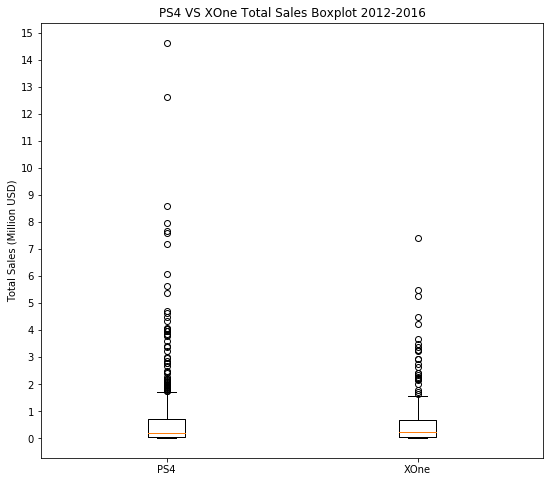

In [25]:
# Prepare the data

boxplot_data = [df_filtered.query('platform == "PS4"')['total_sales'],
                df_filtered.query('platform == "XOne"')['total_sales']]

# Draw a boxplot

plt.figure(figsize=(9,8))
plt.boxplot(boxplot_data, labels=['PS4', 'XOne']);
plt.ylabel("Total Sales (Million USD)")
plt.title("PS4 VS XOne Total Sales Boxplot 2012-2016")
plt.yticks(ticks=range(0,16))

# Print average sales on both platforms

print("Average total sales for PS4 game: {:.2f} Million USD".format(df_filtered.query('platform == "PS4"')['total_sales'].mean()))
print("Average total sales for XOne game: {:.2f} Million USD".format(df_filtered.query('platform == "XOne"')['total_sales'].mean()))

The boxplots of the two platforms are very similar, until we reach the outliers. In PS4 the third quartile is just a little higher than XOne, but on both platforms it is smaller than 1M USD. However, PS4 has much higher outliers that reach 12 and 14 Million USD. This is one of the reasons that the average total sales for a PS4 games is greater by 0.15M USD.

#### Conclusion

The conclusion is that there is no significant differce in the revenues of most games in PS4 and XOne. However, the most selling games are the one who create the difference between these two platforms.

### User/critics scores and sales
In this section I will examine how user and critic scores affected sales in PS4 platform. I will create a scatter plot and calculate the correlation between reviews and sales.

#### PS4

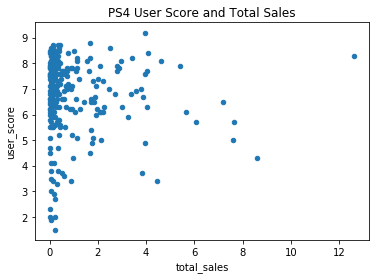

In [26]:
# Scatter plot for 'user_score'

df_filtered.query('platform == "PS4"').plot(kind='scatter', y='user_score', x='total_sales',
                                           title='PS4 User Score and Total Sales');

Two conclusions could be derived from this scatter plot. First, higher user score will not necessarily help the game earn more sales, as there are many game that achieved a score of 6 and more, but their sales is close to zero. However, it can be seen that most of the games that had total sales of more than 1M USD got relatively high scores (5 or more).

The exception is a group of games with a score of 3.5 to 6.5, with total sales of 4 to 9 million USD.

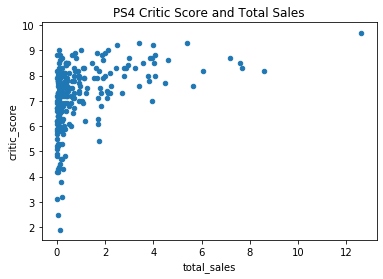

In [27]:
# Scatter plot for 'critic_score'

df_filtered.query('platform == "PS4"').plot(kind='scatter', y='critic_score', x='total_sales',
                                           title='PS4 Critic Score and Total Sales');

The first conclusion applies to the critic score as well - there are many games with high score that their total sales are close to zero. However, unlike the user score scatter, all the games who ended up with more than 2M USD were given a score of 7 or more. 

In [28]:
# Calculating correlation between user score, critic score and total sales

df_filtered.query('platform == "PS4"')[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Despite the patters that could be spotted in the scatter plot, calculating the correlation doesn't show a strong connection between the factors. Total sales and critic_score has a correlation of 0.4, which is not very strong, while total sales and user score actually has a very weak negative correlation. 

#### XOne
I will perform the same process for the platform XOne as well, to see whether the results are different.

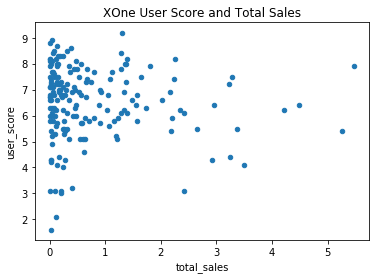

In [29]:
# Scatter plot for 'user_score'

df_filtered.query('platform == "XOne"').plot(kind='scatter', y='user_score', x='total_sales',
                                            title='XOne User Score and Total Sales');

Here as well, most highly rated games' total sales were close to zero. Most of the games that sold in more than 1M USD were in the upper half of user score (5 to 10). However, there are more such games that were rated between 5 to 7. There are also a few games that were rated below 5 and had total sales of 2 to 4 Million USD. 

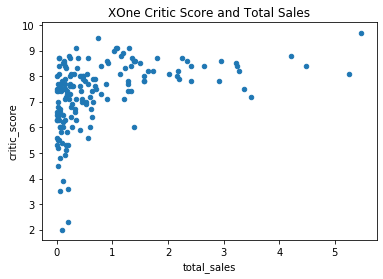

In [30]:
# Scatter plot for 'critic_score'

df_filtered.query('platform == "XOne"').plot(kind='scatter', y='critic_score', x='total_sales',
                                           title='XOne Critic Score and Total Sales');

This scatter is similar to the one in PS4 platform, where many highly selling games were rated above 7. Of course, we cannot ignore that most highly rated games were below 1 Million USD of total sales.

In [31]:
# Calculating correlation between user score, critic score and total sales

df_filtered.query('platform == "XOne"')[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


Similarly to the PS4 platform, the correlations do not indicate a strong connection between the factors. The correlation between total sales and critic score is a little stronger in XOne, but still relatively weak. The negative correlation between user score and total sales grew a little, but is still not significant. 

#### Conclusions

The following conclusions could be derived from the analysis:
- In both platforms, most games had total sales close to zero regardless of user\critic score.
- In both platforms, almost all games with greater total sales had a relatively high critic score.
- In both platforms, most games with greater total sales had a user score in the upper half (5 to 10).
- The correlation between total_sales and critic_score is weak, and there's no correlation between user_score and total_sales.

### Game Profits by Genre
In this section I will examine the relation between genres and profits. I will try to determine profitable and less profitable genres. 

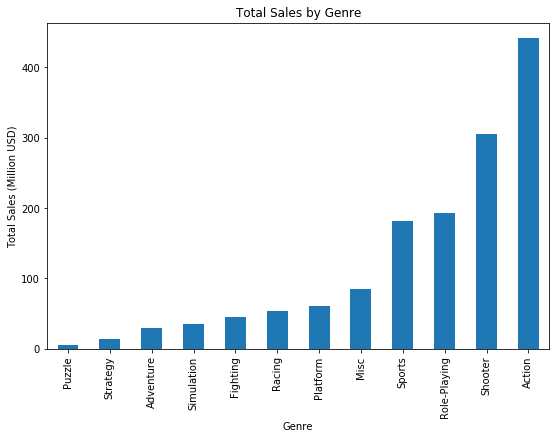

In [32]:
# Calculate total sales sum per genre

sales_genre = df_filtered.groupby('genre')['total_sales'].sum().sort_values()

# Build a bar plot of total sales for each genre

sales_genre_plot = sales_genre.plot(kind='bar', figsize=(9,6), title='Total Sales by Genre');
sales_genre_plot.set_xlabel("Genre");
sales_genre_plot.set_ylabel("Total Sales (Million USD)");

The data shows that action games are the most profitable games, while shooter, role-playing and sports games come next. The least profitable games are Puzzle games, strategy and adventure.

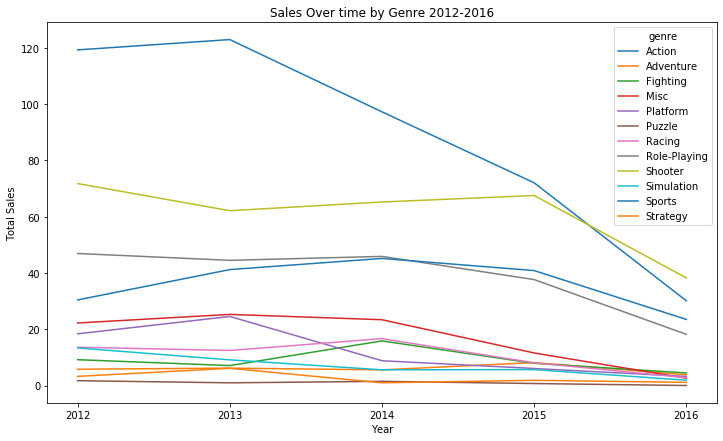

In [33]:
# Create a pivot table of total sales by genre and year_of_release

sales_genre_years = df_filtered.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')

# Build a line plot of sales over time per genre

sales_genre_years.plot(kind='line', figsize=(12,7));
plt.title('Sales Over time by Genre 2012-2016');
plt.ylabel("Total Sales");
plt.xlabel("Year");
plt.xticks(ticks=range(2012,2017));

Even among the genres many changes happened between 2012 - 2016. The action genre may have been the most profitable for the whole period, but it suffers a constant decrease in sales, and in 2016 it was no longer the most profitable genre. Shooter was the most profitable genre in 2016, but it also decreased in total sales. Generally, we can see that most genres suffered a decrease between 2014 to 2016.

#### Conclusions

The most profitable genres between 2012 and 2016 were Action, Shooter, Role-playing and Sports, while the least profitable genres were Puzzle, Strategy and Adventure. However, all game genres suffered a decrease in total sales between 2014 and 2016. The most profitable genre, Action, lost the top in 2016 to Shooter genre. 

## User Profile per Region
In this section, I will examine each region (NA, EU and JP) separately, to determine:
- Top 5 platforms and their variations from region to region.
- Top 5 regions and their variations from region to region.
- ESRB Rating effect on sales in different regions.


### Platforms

To examine platfom performance in different regions, I will create three bar plots for each region with a sum of platform's total sales in this region.

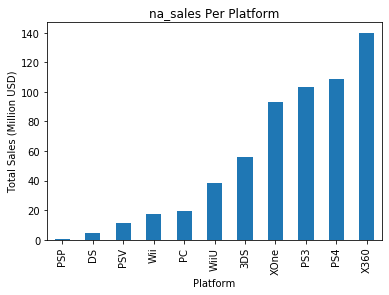

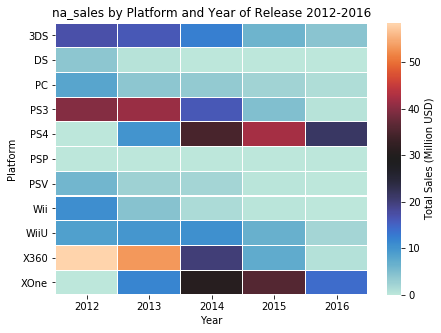

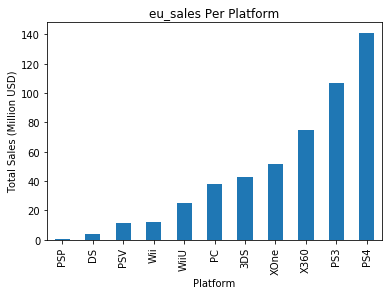

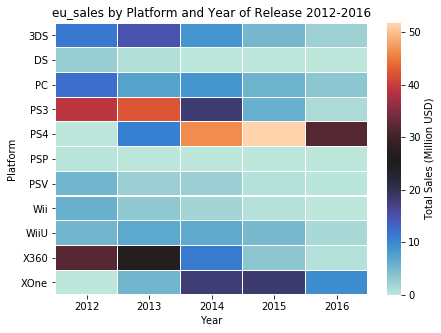

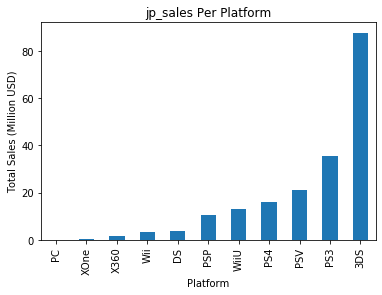

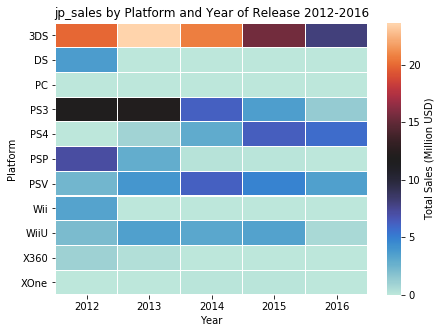

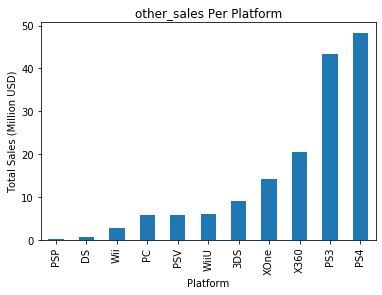

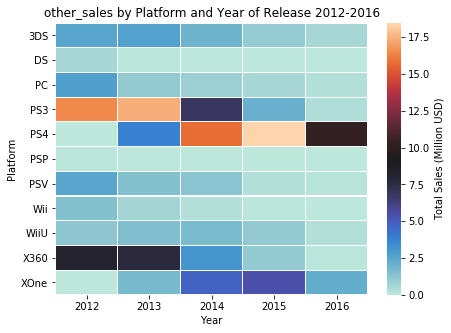

In [34]:
# Save the regions' columns in a list

regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# loop through the regions and draw the relevant plots

for region in regions:
    
    # Bar plot
    
    region_plot = df_filtered.groupby('platform')[region].sum().sort_values().plot(kind='bar', title=region+' Per Platform')
    region_plot.set_xlabel("Platform")
    region_plot.set_ylabel("Total Sales (Million USD)")
    plt.show()
    
    # Create a heatmap by years
    
    sales_region_platform_heatmap = df_filtered.pivot_table(index='platform', columns='year_of_release',
                                               values=region, aggfunc='sum', fill_value=0)

    plt.figure(figsize=(7,5))
    sns.heatmap(sales_region_platform_heatmap, cmap="icefire", linewidths=0.1, cbar_kws={'label': 'Total Sales (Million USD)'});
    plt.title(region + ' by Platform and Year of Release 2012-2016');
    plt.ylabel("Platform");
    plt.xlabel("Year");
    plt.show()

As can be seen in the bar plots, the top platforms vary quite significantly between the regions. Here are the top five platforms for each region:
- North America - X360 is the most profitable platform in North America. Then come PS4, PS3 and XOne, with similar sales rates. 3DS is closing the list and is less profitable than the rest. However, X360 is fading away. PS4 and XOne were stronger in the past two years.
- Europe - In europe, X360 is losing the top and moves down to 3rd place. PS4 is the most profitable platform, and PS3 comes second. XOne and 3DS stay in 4th and 5th place, but they sell less than in North America. It is worth paying attention to XOne, which had more profits than PS3 in 2016.
- In Japan, the top five platforms are mainly different. Here 3DS is by far the most profitable platform, with a large gap from PS3 which is second. There are new platforms in the 3rd and 5th places, PSV and WiiU, while PS4 is 4th. Even so, it is worth paying attention to PS4, which had a significant increase in hte past 3 years, while PS3 in second place is shrinking. 
- In other regions, the top platforms are the same as in Europe, and the market shares are similar as well. PS4 and XOne are expected to be the top platforms in this region.

### Genres
On the same manner, I will examine the top genres for each region.

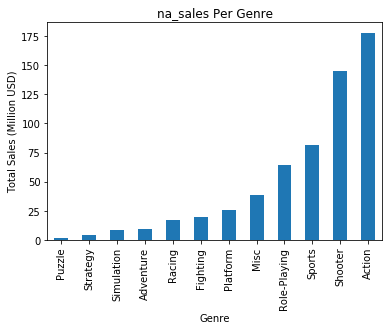

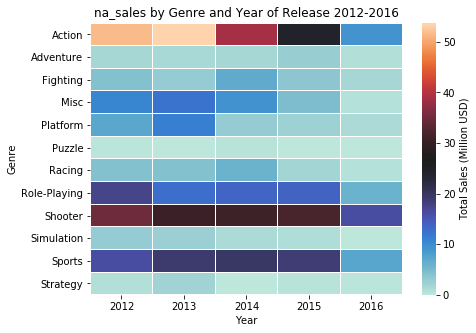

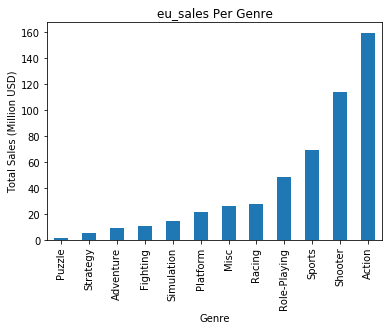

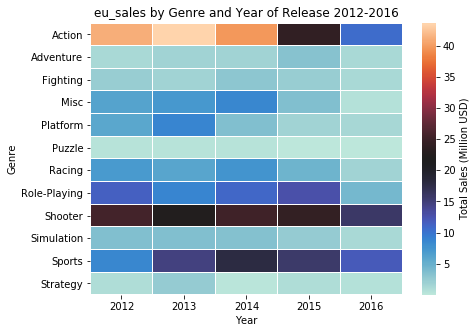

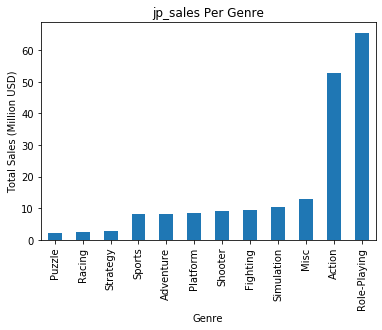

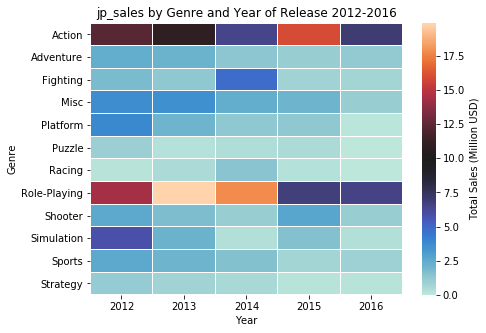

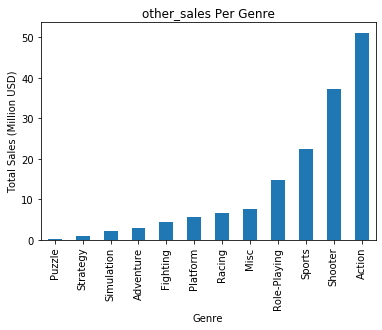

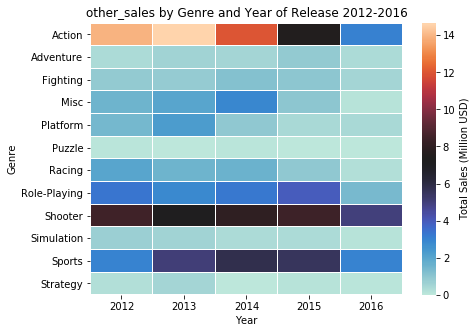

In [35]:
# loop through the regions and draw the relevant plots

for region in regions:
    
    # bar plot
    
    region_plot = df_filtered.groupby('genre')[region].sum().sort_values().plot(kind='bar', title=region+' Per Genre')
    region_plot.set_xlabel("Genre")
    region_plot.set_ylabel("Total Sales (Million USD)")
    plt.show()

    # Create a heatmap by years
    
    sales_region_genre_heatmap = df_filtered.pivot_table(index='genre', columns='year_of_release',
                                               values=region, aggfunc='sum', fill_value=0)

    plt.figure(figsize=(7,5))
    sns.heatmap(sales_region_genre_heatmap, cmap="icefire", linewidths=0.1, cbar_kws={'label': 'Total Sales (Million USD)'});
    plt.title(region + ' by Genre and Year of Release 2012-2016');
    plt.ylabel("Genre");
    plt.xlabel("Year");
    plt.show()    

The results regarding genres are different than the platforms. Here, most of the world shares the same taste. In North America, Europe and other regions (except Japan), the top 4 genres are Action, Shooter, Sports and Role-playing. The 5th is Misc in North America and other region, while in Europe Racing is 5th. However, Japan is totally different. In Japan there are two genres which are much more profitable than the rest: Role-Playing and Action. The next three are Misc, Simulation and Fighting, which have similar sales as the next 4 genres.

### ESRB Rating
In this section I will investigate whether ESRB ratings affect sales in each region.

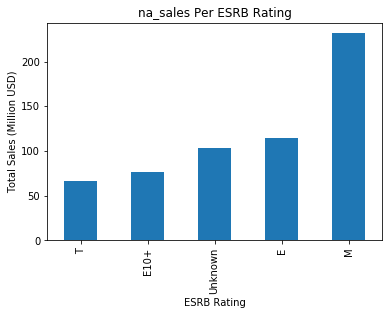

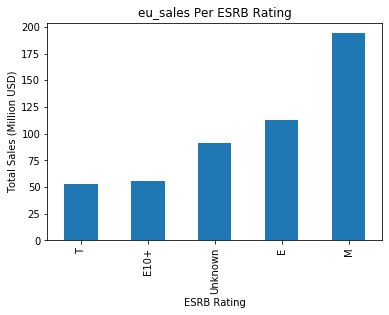

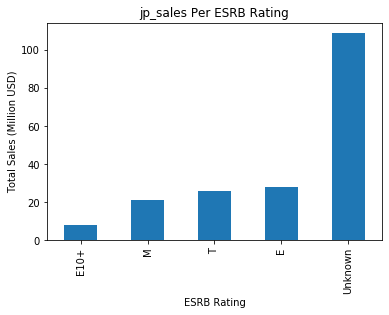

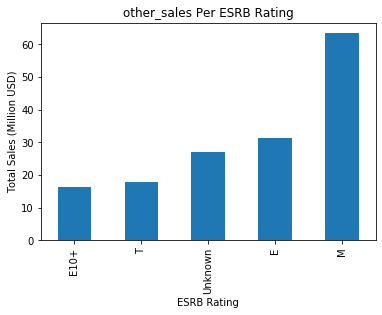

In [36]:
# loop through the regions and draw the relevant plots

for region in regions:
    
    # bar plot 
    
    region_plot = df_filtered.groupby('rating')[region].sum().sort_values().plot(kind='bar', title=region+' Per ESRB Rating')
    region_plot.set_xlabel("ESRB Rating")
    region_plot.set_ylabel("Total Sales (Million USD)")
    plt.show()

As in genres, here as well the image for North America, Europe and other regions is similar. M (Mature 17+) is the most profitable, E (Everyone) is next  by a large gap. However, there are quite a few games where the rating is unknown, and they could have change the data. In Japan, the games with unknown rating are responsible to a very large share of the sales, therefore it is very likely that the data would look different if we knew those ratings. Keeping that in mind, it is actually E (Everyone) category that is the most profitable, with T (Teen) following. M (Mature) is only third.

### Conclusion

The main differences are between Japan and the rest of the regions, in the top platforms, genres and ESRB rating. In Japan, 3DS platform is by far the most profitable, while it is only 5th in the rest of the world. Also, in Japan PSV and WiiU are among the top five platforms, and they are less profitable in other regions. In the rest of the world the top platforms are similar, except that in North America the X360 platform is the most profitable. However, it seems that in the near future, PS4 and XOne will be the top platforms in all regions but Japan. In Japan, PS4 is growing, while PSV and 3DS are still strong, but XOne doesn't seem to grow yet.

In genres, the world (except Japan) is consistent about 4 top genres (Action, Shooter, Sports, Role-Playing). They only vary on the 5th, where in Europe Racing is more profitable than Misc. In Japan, there are two genres which are very profitable (Role-Playing and Action). The next three (Misc, Simulation and fighting) are much less profitable.

The data in ESRB rating is not complete - there are many games with unknown rating. However, in all regions but Japan, M (Mature) and E (Everyone) are the most profitable ratings. In Japan, the highest share of sales came from games with unknown ratings, which might make the data unreliable. However, in Japan E (Everyone) is the most profitable, and T (Teen) comes second.

## Hypotheses Tests

In this section I will test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

I'll set the alpha threshold as 0.05. This means that if the hypothesis is true, there's a 5% chance that the same results would be achieved randomly. This will give me enough confidence that the hypothesis is indeed true, and not a result of chance.

### Xbox One and PC Platforms

In this section I will test the hypothesis that the average user ratings of the Xbox One and PC platforms are the same. In order to do that, I need to check the equality of these to populations means. My null hypothesis is that the average user ratings of Xbox One and PC are the same. The alternative hypothesis is that it is not equal. I will use the 'ttest_ind' method.
First, I will check the variances  of the groups, to understand which value should be applied to the parameter 'equal_var'.

In [37]:
# Set variables with user_score data for each platform

XOne_user_score = df.query('platform == "XOne"').notnull()['user_score']
PC_user_score = df.query('platform == "PC"').notnull()['user_score']

# Calculate variance

XOne_variance = np.var(XOne_user_score)
PC_variance = np.var(PC_user_score)

# Check the difference in variances

print("XOne variance:", XOne_variance)
print("PC variance:", PC_variance)

print(1-(PC_variance/XOne_variance))

XOne variance: 0.19390581717451524
PC variance: 0.16557813204929817
0.14608991900290524


The variance difference is more than 5%. Therefore, I need to use equal_val=False.

In [38]:
alpha = 0.05

# Test the hypothesis

results_xone_pc = st.ttest_ind(XOne_user_score, PC_user_score, equal_var=False)

print('p-value', results_xone_pc.pvalue)

if (results_xone_pc.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value 0.08359853258490975
We can't reject the null hypothesis


The null hypothesis cannot be rejected. This means, that we cannot rule out the possibility that the average user ratings of Xbox One and PC platforms are the same.

###  Action and Sports Genres

In this section, I will test the hypothesis that the average user ratings for the Action and Sports genres are different. My null hypothesis is that the average user ratings are equal. The alternative hypothesis is that they are different. Hence, if the hypothesis will be rejected, it will mean that the original hypothesis was true. I will use the same method I used for the previous hypothesis.

In [39]:
# Set variables with user_score data for each genre

Action_user_score = df.query('genre == "Action"').notnull()['user_score']
Sports_user_score = df.query('genre == "Sports"').notnull()['user_score']

# Calculate variance

Action_variance = np.var(Action_user_score)
Sports_variance = np.var(Sports_user_score)

# Check the difference in variances

print("Action variance:", Action_variance)
print("Sports variance:", Sports_variance)

print(1-(Sports_variance/Action_variance))

Action variance: 0.24813480619349804
Sports variance: 0.24908563306623638
-0.003831896408748481


Here the difference in variance is < 5%. Hence, I will use equal_var=True.

In [40]:
# Test the hypothesis

results_action_sport = st.ttest_ind(Action_user_score, Sports_user_score, equal_var=True)

print('p-value', results_action_sport.pvalue)

if (results_action_sport.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value 4.490385861797943e-08
We reject the null hypothesis


Here the null hypothesis is rejected. Therefore, the alternative hypothesis is correct: The average user ratings for Action and Sports genres are different. 

## General Conclusions
In this project, I examined data regarding video games for the online store Ice. The data included games genres, platforms, ratings and sales information. My goal was to spot patterns that determine whether a games succeds or not, to plan and adjust advertising campaigns. 

### Preparing and Filtering the Data

Before starting, I made some preprocessing of the data. I decided to leave some of the missing values blank, as they represented a relatively large share of the data. I also created a new column for the total sales of each game.

In my analysis, I identified that the number of games released each year varied significantly, in part because of platforms that lost their popularity. I saw that generally, it takes 7-10 years for a platform to fade away. Thus, I decided to focus on the years 2012 to 2016.

### Top Platforms

During this time frame, PS4, PS3, X360, 3DS and XOne were the most profitable platforms. However, it seems that sales decreased for all platforms. PS4 and XOne are expected to remain with relatively higher sales rates, and even increase in some regions. The difference in sales of each platform is usually determined by a small group of games with very exceptional sales, but for most games there are no significant differences across platforms. 

### Critic and User Score

Critic and user score usually will not affect the sales for a game. However, in almost all cases, a profitable game will have a very high critic score. This relation is weaker with user scores, but it also exists.

### Top Genres

The most profitable genres between 2012 and 2016 were Action, Shooter, Role-playing and Sports. It is worth mentioning that all genres suffered a decrease between 2014 to 2016. In 2016, Action was no longer the most profitable genre, as it was replaced by Shooter. 

### Regions Differentiations

It should also be mentioned that there are great differences between different regions, espacially Japan. The most profitable platform in North America is X360, while in Europe and other regions it is PS4. In Japan, though, it is 3DS. In North America, Europe and other regions, PS4 and XOne are growing quickly, and they are expected to be the most profitable platforms soon. In Japan, PS4 is growing, while XOne did not grow significantly the past few years. It is likely that the top platforms will be PS4, 3DS and PSV. 

The top genres in Japan are Role-Playing and Action, while in the rest of the world it's Action, Shooter, Sports, Role-Playing and Racing/Misc. It could be that the Shooter genre is starting to gain more sales in Japan, while Role-Playing is growing in the rest of the regions.

As for the ESRB Rating, In most of the world M (Mature) is the most profitable, with E (Everyone) behind. In Japan, E (Everyone) and T (Teen) are in the top, not by much. However, it is worth mentioning that the data is incomplete. 

### Hypotheses Testing

Finally, I tested two hypotheses. The first hypothesis claimed that the average user ratings of the Xbox One and PC platforms were the same. This hypothesis could not be rejected. The second hypothesis, that average user ratings for the Action and Sports genres are different, turned out to be true.

### Summary

For 2017, I would recommend to focus on the platforms PS4 and XOne in North America, Europe and other regions. In Japan, it is recommended to go for PS4, 4DS and PSV. These are the platforms that are currently growing.

I would suggest to concentrate the efforts on the genres Action, Shooter, Sports and Role-Playing; Role-Playing and action only for Japan.

It is suggested to focus on games with M (Mature) rating on higher priority, and then E (Everyone). In Japan the difference is less significant. 